In [174]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import sqlite3
from sklearn.cross_validation import train_test_split
%matplotlib inline

# read in data (x) and labels (y)
data = pd.read_csv("x_named_z.csv", low_memory=False, index_col=0)
labels = pd.read_csv('y_named.csv', header=None) 

x = data
x = x.drop('UNITID', axis=1)

y = pd.read_csv('y_named.csv',low_memory=False,header=None)
schools = y.ix[:,0]
y.index = schools
list_schools = schools.tolist()
y.index = list_schools
y = y.drop(0,axis=1)

# split the data and labels in training and testing sements
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10)

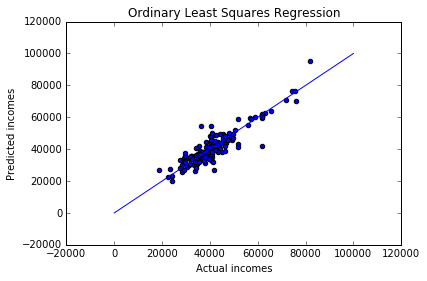

RMSE: 4668.07435112
r2: 0.812665561896


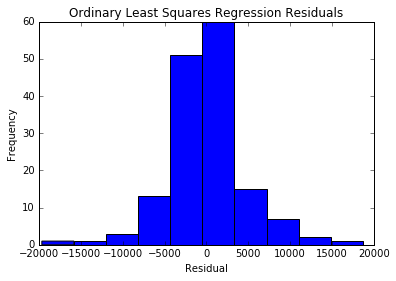

                                                         1
University of Phoenix-Online Campus          -19654.410999
Alaska Pacific University                    -14790.091811
Argosy University-Orange County              -10028.328554
University of Alabama in Huntsville           -9106.495799
Argosy University-Washington DC               -8241.698379
Covenant College                              -8005.544215
Alderson Broaddus University                  -7469.919969
Stevenson University                          -7429.381287
Aquinas College                               -7343.856607
American InterContinental University-Atlanta  -7056.688104
                                                               1
The Art Institute of California-Argosy Universi...  18690.700005
University of Hawaii at Manoa                       13670.486324
Southern College of Optometry                       13253.914848
Goldey-Beacom College                                9235.261916
National University Colleg

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:26: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


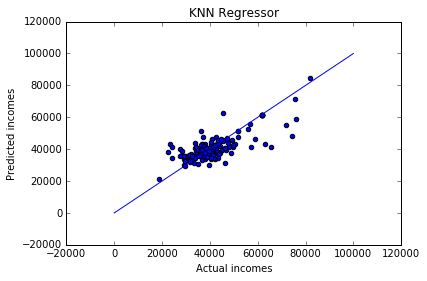

RMSE: 6809.60971096
r2: 0.60135480368


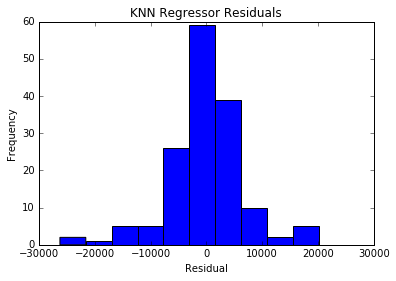

                                                       1
Southwestern Law School                           -26240
Rush University                                   -24100
Kettering University                              -19980
University of Pennsylvania                        -16620
Charles R Drew University of Medicine and Science -16280
Illinois Institute of Technology                  -15560
D'Youville College                                -14940
Worcester Polytechnic Institute                   -12520
SUNY at Binghamton                                -11340
High Point University                              -9500
                                              1
Marlboro College-Graduate School          20120
Warren Wilson College                     17220
Middlebury College                        17080
Gallaudet University                      16000
Argosy University-Los Angeles             15500
Stephens College                          12600
University of California-Santa Cruz  

In [196]:
def plotPred(y_predict, y_test, name):
    plt.figure()
    plt.scatter(y_test, y_predict)
    t = np.arange(0, 100000, 1)
    plt.plot(t,t)
    plt.xlabel('Actual incomes')
    plt.ylabel('Predicted incomes')
    plt.title(name)
    plt.show()
    print("RMSE:", rmse(y_test, y_predict))    
    print("r2:", r2_score(y_test, y_predict))

def plotResiduals(y_predict, y_test, name):
    plt.figure()
    plt.hist(y_predict-y_test)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title(name + ' Residuals')
    plt.show()

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())[1]

def listTenLargestResiduals(y_predict, y_test):
    residuals = (y_predict-y_test)
    residuals_10worst = residuals.sort(1,axis=0)
    print(residuals_10worst.head(n=10))
    residuals_10best = residuals.sort(1,axis=0,ascending=False)
    print(residuals_10best.head(n=10))

# fit and test the regressor, output graph and evaluation statistics
def regress(model, name):
    reg = model
    reg.fit(x_train, y_train)
    y_predict = reg.predict(x_test)
    plotPred(y_predict, y_test, name)
    plotResiduals(y_predict, y_test, name)
    listTenLargestResiduals(y_predict, y_test)
        
regress(linear_model.LinearRegression(), 'Ordinary Least Squares Regression')
regress(KNeighborsRegressor(), "KNN Regressor")

In [197]:
# regress(linear_model.Ridge(), 'Ridge Regression')
# regress(linear_model.Lasso(), 'Lasso Regression')
# regress(linear_model.ElasticNet(), 'Elastic Net Regression')
# regress(DecisionTreeRegressor(max_depth=10), 'Decision Tree Regression')
# regress(RandomForestRegressor(n_estimators = 100, max_depth = 5, warm_start = False), 'Random Forest Regression')